In [ ]:
import numpy as np



In [ ]:
#The implementation of the loss function.

def loss(w1,w2):
  point = np.matrix([[w1],[w2]])
  M= np.matrix([[3,0],[0,2]])

  theta=np.radians(30) # The constant given in class.
  p=0.1

  part1= np.matmul(np.matmul(point.T,M),point)

  #Couldn't find a properly functioning dot product numpy function so I
  #Hard coded it.
  part2= np.cos(theta)*w1 +np.sin(theta)*w2

  #Values are segmeneted for debugging and recombined here.
  return np.cos((part1-p*part2))

In [ ]:

#Hard finds a minimum by examining 1000^2 points in the [0,1],[0,1] area.
#Results in a loss of -1 at point, w1=0.951 and w2=0.518

#This takes a while to run.
min=100
minx=0
miny=0
for x in range(1001):
  for y in range(1001):
      if min> loss(x/1000,y/1000):
        #If a smaller loss value is found, reassign it.
        minx=x/1000
        miny=y/1000
        min=loss(x/1000,y/1000)
print("Minimum? {}".format(min))
print("Mininimum point, w1 {}  w2 {}".format(minx,miny))


#I also discovered by graphing 3xx+2yy-0.1(xcos(30)+ysin(30)) = pi ,
# There is an arc of minimums, in the first quadrant, so this minimum is
# not unique.
# *see attached picture.

Minimum? [[-1.]]
Mininimum point, w1 0.951  w2 0.518


In [ ]:
#Runs a trial to look for a minimum.
def minimumTrial(stepSize=0.01,steps=500):
  #Starts at a random point.
  start=[np.random.random(),np.random.random()]
  start=np.around(start,5)

  #Runs around a bit.
  for x in range(steps):
    gradient1= loss(start[0],start[1])-loss(start[0]+0.01,start[1])
    gradient2= loss(start[0],start[1])-loss(start[0],start[1]+0.01)
    start[0]=start[0]+gradient1*stepSize
    start[1]=start[1]+gradient2*stepSize

  #returns final point.
  return start


In [ ]:
print(minimumTrial(0.1,1000))
#This section is mostly to verify my results.
#Since the loss function is within the range of cosine, I would assume that the
#minimum loss would be around -1. So this checks if my general strategy is working.
wins=0
entries=[]
for x in range(100):

    entry=minimumTrial(0.1,500)
    entries.append(entry)
    if   loss(entry[0],entry[1]) < -0.9 :
      wins+=1
print(wins)


[0.96549595 0.46085806]
85


In [ ]:
#This method is about the same as minimum trial but returns the points traversed
# to get to the result.
# This method is much more customized and more consistent than the previous one.

def plotTrial(stepSize, steps):
  #Randomizes the start. Each value is between 0 and 1.
  start=[np.random.random(),np.random.random()]
  # Rounds the values, I was getting errors before I did this because the numbers
  # were too long or something.
  start=np.around(start,5)
  #Add the first entry.
  entryArrs=[start]
  gradConstant=0.001


  for x in range(steps):
    #Not sure if this gradient is optimal but it usually works.
    gradient1= loss(start[0],start[1])-loss(start[0]+gradConstant,start[1])
    gradient2= loss(start[0],start[1])-loss(start[0],start[1]+gradConstant)

    #Cuts down on computing time hopefully.
    #Basically if we are around halfway there and the gradients are really small,
    #Then exit out.
    if x > steps/2 and gradient1+gradient2 < 0.00001:
      return entryArrs
    #Update values.
    start[0]=start[0]+gradient1*stepSize
    start[1]=start[1]+gradient2*stepSize
    entryArrs.append([start[0],start[1]])

  return entryArrs


In [ ]:
import matplotlib.pyplot as plt


Loss at the final point [[-0.99999792]]


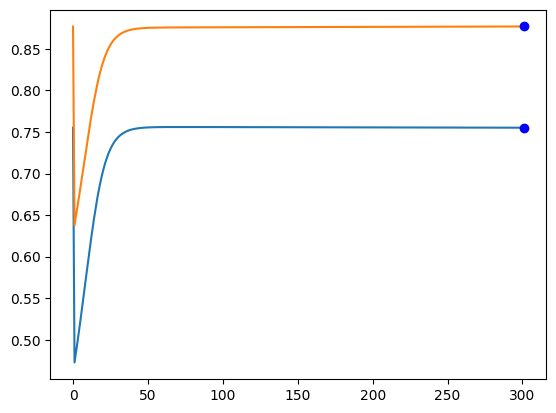

In [ ]:
entriez=plotTrial(4.5,600) #Grab entries.

#Separate out x (w1) and y (w2) values.
xVals=[entriez[x][0] for x in range(len(entriez))]
yVals=[entriez[y][1] for y in range(len(entriez))]

#Grab the loss values. They are not used here but I did use them in the past.
lossVals= [loss(xVals[x],yVals[x]).A[0] for x in range(len(yVals))]

k=[x for x in range(len(lossVals))]

plt.plot(k,xVals,label ="w1")
plt.plot(k,yVals,label ="w2")
plt.plot(len(yVals)-1,yVals[len(yVals)-1],'bo')
plt.plot(len(yVals)-1,xVals[len(yVals)-1],'bo')

#Prints the loss of the final point.
print("Loss at the final point",loss(xVals[len(xVals)-1],yVals[len(yVals)-1]))
plt.show()